# 5COM1056
## Third Assignment: Genetic Algorithm

Complete the code below (in Python 2) as explained in the assignment.

The code given below also documents how the outcome should look like.

### Grade and marking
12.5% of total score in this module (1/4 of coursework).

Full marks in each tasks will only be given for code that correctly solves the task. It is not sufficient to just make it pass the assertions - e.g. by coding the result directly into the functions.

### Submission 
Submit your Ipython notebook (the \*.ipynb file) as well as electronically on StudyNet __before December 19, 9am.__ 

Rename this notebook to *your_last_name*_assignment_3.ipynb. Then File -> Download as -> Notebook. It is very important to give your file the correct name. Failure to do so is penalized with 2 marks.

In addition, please also supply a PDF copy of the notebook.
 * In Ipython v3 (university computers): Print this webpage as PDF. 
 * In Ipython v4 (new versions of Ipython/Jupyter): Download your notebook as PDF. You may have to install additional packages, e.g. pandoc. If you use anaconda, you can do this by running `conda install pandoc` in a terminal. 
 
**Submit both the ipynb and pdf files.**


### Note on plagiarism 
We strongly encourage that you help each other by discussing possible coding strategies. However, please do not share your solution code with others. 

The university takes plagiarism very seriously. Since we cannot trace who created plagiarised code first, *all* participants with duplicate code will receive *zero marks* (except for code bits that are too short or so straightforward that there is essentially only one way to do it). Therefore, it is safe and smart not to give your code to others who may copy it. 

## Preliminaries
The following code is required to run the assignment code and does not need to be changed.

In [8]:
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# the following code is provided and doesn't need to be changed.

def selection(population,number_of_parameters):
    '''
    Rank the individuals of the population 
    '''
    # we implement rank selection here, i.e. the self.size individuals with the highest fitness go to the next stage
    # in the current implementation that simply means that we have to sort the population according to fitness 
    #(the last column)

    population = population[population[:,number_of_parameters].argsort()] # this sorts the array with the individuals with the lowest fitness at the top (remember
    # we want to minimize our function)
    return population

def evaluateFitness(population,capacity,number_of_parameters):
    '''
    Evaluate the fitness of  all individuals
    '''
    for i in range(capacity):
        #print 'evaluation:',i
        # take the parameters of the i-th individual and evaluate the fitness, save the fitness value in the last column 
        population[i,number_of_parameters] = fitness_function(population[i,0:number_of_parameters]) 
    return population

def visualize(population,size):
    '''
    Visualize each individual of the population in a 3D plot. 
    The individual with the best fitness is marked with a red cross
    '''
    # Note: only works for two parameters (but that's all we need for this exercise)
    fig = plt.figure()
    ax3d = fig.add_subplot(111,projection='3d')
    ax3d.scatter(population[1:size,0],population[1:size,1],population[1:size,2],c='k',marker='o') # plot all individuals in black with a 'o' marker
    ax3d.scatter(population[0,0],population[0,1],population[0,2],c='r',marker='x') # plot the best individual in red with a 'x' marker
    plt.show()

## Task 1 — 1.5 marks
Complete the code in `fitness_function`, so that it returns the value of

$f(x,y) = 3 · x^2 + 4 · y^2$ ,

as explained in the function definition. 

The cell below should produce no error when executed. 


In [9]:
def fitness_function(params):# the function to optimize
    """
    Computes the "fitness" of a set of parameters. The lower the fitness, the better.
    """
    x = params[0]
    y = params[1]
    fitness = None # here you should replace None with the code for the function of x and y as above
    return fitness 

###### don't change the code below

assert fitness_function([3,4]) == 91, 'please check your implementation'
assert fitness_function([3,2]) == 43, 'please check your implementation'
assert fitness_function([5,23]) == 2191, 'please check your implementation'

AssertionError: please check your implementation

## Task 2 — 4 marks

The mutation function takes a parameter population and performs a mutation on a random subset (of size $size*r_{mutation}$) of the population. The parameter population is a set of individuals, where each indivdual $i$ is a tuple of parameters $(x_i,y_i)$ which can be evaluated with the fitness_function from task 1. On each individual of the randomly selected subset, mutation should be performed in the following way: 

1) A mutation on a parameter of the individual is performed with a probability of $p_{mutation}$. 

2) If a mutation is performed on a parameter, then a randomly chosen number in the interval $[-0.5*s_{mutation},0.5*s_{mutation})$ is added to
the current parameter value.

3) The newly produced individuals are stored in the population array after the actual population

Fill in the code in the mutation function below so that mutation on the population is performed as described above.


In [10]:
def mutation(population, size, r_mutation, p_mutation, s_mutation, number_of_parameters):
    '''
    mutation - mutate a random subset of the population
    Parameters:
    population - the population from the current generation
    (We simply represent the parameters as a numpy array, and initialize it with random numbers
    the first size rows represent the actual population, the rest gets filled during mutation and crossover
    the first number_of_parameters columns contain the parameters, the last column contains the fitness value)
    size - the size of the population
    r_mutation - the percentage of individuals from the population that undergo mutation
    p_mutation - the probability of a mutation of a single parameter of an individual
    s_mutation - the strength of the mutation
    number_of_parameters - the number of parameters each individual has
    '''
    # choose a random subset of the population which will undergo mutation
    cutoff = int(size*r_mutation) # this is the number of individuals that will undergo mutation
    indices = np.arange(size)
    np.random.shuffle(indices)
    mutation_set = indices[:cutoff] # these are the indices of the randomly chosen individuals that will undergo
                                    # mutation

    for i in mutation_set: # loop through all individuals that undergo mutation
        for j in range(number_of_parameters): # loop through all parameters of each individual
            print i
            # here you should place your code for task 2); 
            # the comments in the following lines give you a hint of what you are supposed to do
            
            # draw a random number in the interval [0,1)
            # decide whether to mutate or not
                # translate r to [-0.5,0.5)
            # perform mutation, i.e. change the value at position i,j by r*s_mutation and write it to the correct position 
            # in the array!
            
    return population


###### don't change the code below
population = np.random.random_sample((25,3)) 
pop = np.array(population) 
mutation_population = mutation(population,10,1.0,1.0,1.0,2)


assert mutation_population[10,0] != pop[10,0], 'please check your implementation'
assert mutation_population[10,1] != pop[10,1], 'please check your implementation'
assert mutation_population[11,0] != pop[11,0], 'please check your implementation'
assert mutation_population[11,1] != pop[11,1], 'please check your implementation'
assert mutation_population[12,0] != pop[12,0], 'please check your implementation'
assert mutation_population[12,1] != pop[12,1], 'please check your implementation'
assert mutation_population[13,0] != pop[13,0], 'please check your implementation'
assert mutation_population[13,1] != pop[13,1], 'please check your implementation'
assert mutation_population[14,0] != pop[14,0], 'please check your implementation'
assert mutation_population[14,1] != pop[14,1], 'please check your implementation'

5
5
5
6
6
6
7
7
7
0
0
0
9
9
9
4
4
4
2
2
2
8
8
8
3
3
3
1
1
1


AssertionError: please check your implementation

## Task 3 — 4 marks

The crossover function takes a parameter population and chooses a random set of individuals (of size $size*r_crossover$) which serve as parents for the crossover. For each pair of parents one offspring is produced.
Each parameter of the offspring is either from parent 1 or parent 2 with a probability of 50:50.
The newly produced offspring are stored in the population array after the actual population and the mutated individuals.

Fill in the code in the crossover function below so that crossover on the population is performed as described above.


In [11]:
def crossover(population,size,r_crossover,r_mutation,number_of_parameters):
    '''
     crossover - Choose a random subset of the population, select parent pairs and produce offspring
    Parameters:
    population - the population from the current generation
    (We simply represent the parameters as a numpy array, and initialize it with random numbers
    the first size rows represent the actual population, the rest gets filled during mutation and crossover
    the first number_of_parameters columns contain the parameters, the last column contains the fitness value)
    size - the size of the population)
    r_crossover - the percentage of individuals from the population that serve as parents for crossover
    r_mutation - the percentage of individuals from the population that undergo mutation (needed in order
    to correctly store the newly produced offspring!)
    number_of_parameters - the number of parameters each individual has
    '''
    # At the moment, when we do the crossover, the population is already sorted according to fitness values!
    cutoff = int(size*r_crossover) # this is the number of individuals that will undergo crossover
    crossover_set = np.arange(cutoff) # these are the indices of the self.r_crossover % individuals that will undergo crossover

    n = 0
    while n<cutoff:
        individual_a = np.random.choice(crossover_set) # randomly choose the first individual
        crossover_set = [x for x in crossover_set if x not in [individual_a]] # remove the individual from the set
        individual_b = np.random.choice(crossover_set) # randomly choose the second individual from the remaining set
        crossover_set = [x for x in crossover_set if x not in [individual_b]] # remove the individual from the set
        # perform the actual crossover
        
        # here you should place your code for task 3); 
        # the comments in the following lines give you a hint of what you are supposed to do
        
        # loop through all parameters
            # draw a random number in (0,1)
            # if r < 0.5 then take parameter from individual_a
                # write the parameter to the correct position
            # otherwise from individual_b
                # write the parameter to the correct position

        n = n+2 # increase counter by 2, since we have chosen 2 individuals
    return population

###### don't change the code below
population = np.random.random_sample((25,3)) 
pop = np.array(population) 
crossover_population = crossover(population,10,1.0,1.0,2)


assert crossover_population[20,0] != pop[20,0], 'please check your implementation'
assert crossover_population[20,1] != pop[20,1], 'please check your implementation'
assert crossover_population[21,0] != pop[21,0], 'please check your implementation'
assert crossover_population[21,1] != pop[21,1], 'please check your implementation'
assert crossover_population[22,0] != pop[22,0], 'please check your implementation'
assert crossover_population[22,1] != pop[22,1], 'please check your implementation'
assert crossover_population[23,0] != pop[23,0], 'please check your implementation'
assert crossover_population[23,1] != pop[23,1], 'please check your implementation'

AssertionError: please check your implementation

## Task 4 — 3 marks

The evolve function takes the initial population and evolves the population over the number of generations, executing the above functions crossover, selection, mutation and evaluation in the correct order. Make sure you call each function with the correct parameters.

Fill in the code in the evolve function below so that the genetic algortihm is evolved as described above.

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


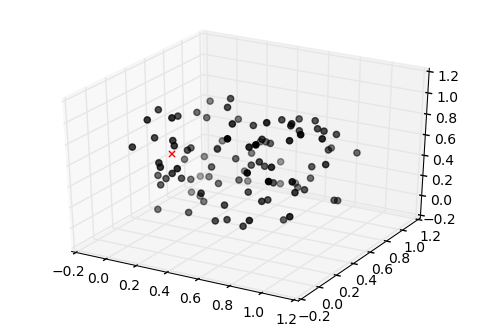

AssertionError: please check your implementation

In [12]:
def evolve(population,size,r_mutation,p_mutation,s_mutation,r_crossover,capacity,number_of_parameters,number_of_generations):
    '''
    evolve - evolves the genetic algorithm for the specified number of generations
    Parameters:
    population - the population from the current generation
    size - the size of the population
    r_mutation - the percentage of individuals from the population that undergo mutation
    p_mutation - the probability of a mutation of a single parameter of an individual
    s_mutation - the strength of the mutation
    r_crossover - the percentage of individuals from the population that serve as parents for the crossover
    capacity - the overall size of the population array (includes the actual population, the newly mutated individuals
    and the newly produced offspring)
    number_of_parameters - the number of parameters each individual has
    number_of_generations - the number of generations the genetic algorithm will be evolved
    '''
    for i in range(number_of_generations):
        print i # print the current generation number
        # here you should place your code for task 4)
        # decide in which order the functions have to be called
        # call them and give them the correct parameters as arguments
    visualize(population,size)
    return population




size = 100 # the size of the population
number_of_parameters = 2 # the number of parameters the function takes
number_of_generations = 20 # number of generations that are executed
p_mutation  = 0.5 # the probability of a mutation
r_mutation  = 0.2 # the percentage of individuals that undergo mutation
s_mutation  = 1.25 # the mutation strength
r_crossover = 0.4 # the percentage of individuals that undergo crossover

capacity = size + int(size*r_mutation) + int(size*r_crossover/2.0) # this is the size of the population after crossover and selection

# We simply represent the parameters as a numpy array, and initialize it with random numbers
# the first size rows represent the actual population, the rest gets filled during mutation and crossover
# the first number_of_parameters columns contain the parameters, the last column contains the fitness value
population = np.random.random_sample((capacity,number_of_parameters+1)) 

final_population = evolve(population,size,r_mutation,p_mutation,s_mutation,r_crossover,capacity,number_of_parameters,number_of_generations)


###### don't change the code below

assert final_population[0,2] < 0.001, 'please check your implementation'
assert final_population[1,2] < 0.001, 'please check your implementation'
assert final_population[2,2] < 0.001, 'please check your implementation'
assert final_population[3,2] < 0.001, 'please check your implementation'
assert final_population[4,2] < 0.001, 'please check your implementation'


